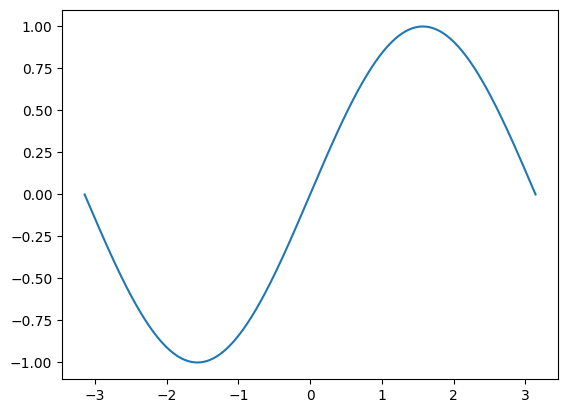

In [1]:
# using numpy to fit a third order polynomial to sine function 

import numpy as np
import math 
import matplotlib.pyplot as plt



x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

plt.plot(x, y)
plt.show()

In [2]:
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

In [3]:
learning_rate = 1e-6
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x**3

    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # update weigths
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d



print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 946.231164960551
199 662.3365898834732
299 464.77497238933523
399 327.17424520240894
499 231.2582891733861
599 164.34691268889026
699 117.6342082865663
799 84.99925455535386
899 62.18370046205585
999 46.222472871239184
1099 35.04930785042266
1199 27.223153450553177
1299 21.73822755595483
1399 17.892031355628173
1499 15.193553261861858
1599 13.299370160276172
1699 11.969130863690511
1799 11.034517771395226
1899 10.377589263150156
1999 9.915656478430094
Result: y = -0.033748225388505075 + 0.8479413942985113 x + 0.005822130452411578 x^2 + -0.09207874407859036 x^3


A pytorch tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these tensors. Behind the scenes, Tensors can keep track of computational graph and gradients, but they are also useful as a generic tool for scientific computing.

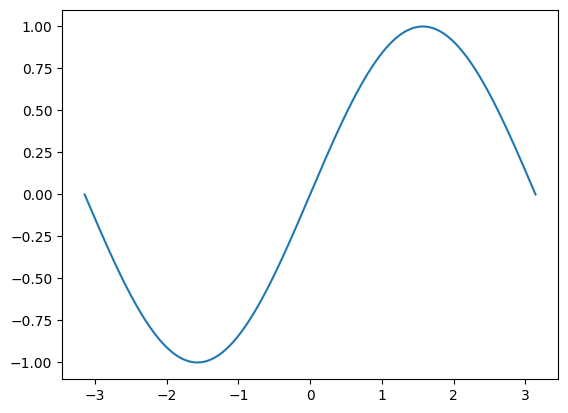

99 2457.8505859375
199 1737.1973876953125
299 1228.8133544921875
399 870.1029052734375
499 616.9539184570312
599 438.2715148925781
699 312.12994384765625
799 223.0659637451172
899 160.17214965820312
999 115.75279998779297
1099 84.37738037109375
1199 62.21280288696289
1299 46.553253173828125
1399 35.48848342895508
1499 27.669574737548828
1599 22.143831253051758
1699 18.238359451293945
1799 15.477852821350098
1899 13.526490211486816
1999 12.14700984954834
Result: y = 0.0607207827270031 + 0.8628146052360535 x + -0.010475344955921173 x^2 + -0.09419432282447815 x^3


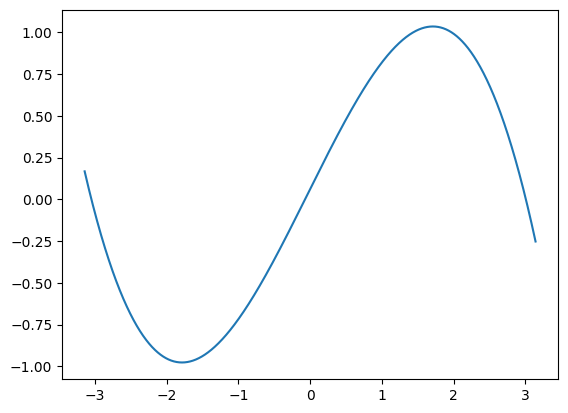

In [21]:
import torch 
import math 


dtype = torch.float
device = "cpu" if torch.cuda.is_available() else "cpu"

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

plt.plot(x, y)
plt.show()
a = torch.randn((), device=device, requires_grad=True, dtype=dtype)
b = torch.randn((), device=device, requires_grad=True, dtype=dtype)
c = torch.randn((), device=device, requires_grad=True, dtype=dtype)
d = torch.randn((), device=device, requires_grad=True, dtype=dtype)



learning_rate = 1e-6

for t in range(2000):
    y_pred = d * x ** 3 + c * x ** 2 + b * x + a

    loss = (y_pred - y).pow(2).sum()


    if t % 100 == 99:
        print(t, loss.item())

    # # Backprop to compute gradients of a, b, c, d with respect to loss
    # grad_y_pred = 2.0 * (y_pred - y)
    # grad_a = grad_y_pred.sum()
    # grad_b = (grad_y_pred * x).sum()
    # grad_c = (grad_y_pred * x ** 2).sum()
    # grad_d = (grad_y_pred * x ** 3).sum()

    loss.backward()

    # Update weights using gradient descent
    # a -= learning_rate * grad_a
    # b -= learning_rate * grad_b
    # c -= learning_rate * grad_c
    # d -= learning_rate * grad_d

    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')
plt.plot(x.detach().numpy(), y_pred.detach().numpy())
plt.show()